In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


Text(0.5,1,u'Class 5')

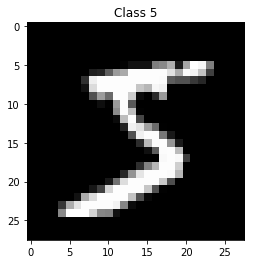

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [8]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [9]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 10, 10, 64)        0         
__________

In [33]:
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [35]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [31]:
# model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))
#steps_per_epoch: number of samples you want to train in each epoch
#One great advantage about fit_generator() besides saving memory is user can integrate random augmentation inside the generator,
#so it will always provide model with new data to train on the fly.
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 228s - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0132 - val_acc: 0.9955
Epoch 2/5
937/937 [==============================] - 245s - loss: 0.0209 - acc: 0.9934 - val_loss: 0.0128 - val_acc: 0.9957
Epoch 3/5
937/937 [==============================] - 374s - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0122 - val_acc: 0.9959
Epoch 4/5
937/937 [==============================] - 280s - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0107 - val_acc: 0.9964
Epoch 5/5
937/937 [==============================] - 277s - loss: 0.0162 - acc: 0.9949 - val_loss: 0.0128 - val_acc: 0.9962


In [36]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

 9984/10000 [============================>.] - ETA: 0s()
('Test accuracy: ', 0.9965)


In [16]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

10000/10000 [==============================] - 10s    


# Pseudo Labelling

In [18]:
class MixIterator(object):
    def __init__(self, iters):
        self.iters = iters
        self.N = sum([it.n for it in self.iters])

    def reset(self):
        for it in self.iters: it.reset()

    def __iter__(self):
        return self

    def __next__(self, *args, **kwargs):
        nexts = [next(it) for it in self.iters]
        n0 = np.concatenate([n[0] for n in nexts])
        n1 = np.concatenate([n[1] for n in nexts])
        return (n0, n1)

In [19]:
predictions = model.predict(X_test, batch_size=64)

predictions[:5]

array([[1.0300492e-08, 7.9412933e-07, 1.1609652e-06, 1.6320976e-06,
        4.5194042e-07, 1.0374140e-07, 7.7104087e-11, 9.9999332e-01,
        1.5481225e-08, 2.3570487e-06],
       [2.8745312e-10, 6.4181776e-08, 9.9999976e-01, 5.9880950e-12,
        3.7718031e-10, 1.8512954e-13, 7.9797992e-08, 1.1675312e-08,
        3.7419370e-10, 1.5435793e-09],
       [1.2103189e-08, 9.9997187e-01, 5.4377421e-07, 1.7917324e-09,
        1.5191706e-06, 4.7652438e-07, 7.0535839e-07, 2.4343799e-05,
        1.6352681e-07, 4.8197870e-07],
       [9.9997377e-01, 1.0294924e-09, 1.4700006e-06, 2.4718116e-08,
        1.7905523e-07, 1.2768803e-07, 1.1775059e-05, 1.8135929e-09,
        7.7660161e-06, 4.9270820e-06],
       [4.7218132e-09, 6.8406729e-09, 8.0438911e-10, 1.1800210e-11,
        9.9999523e-01, 1.1659365e-09, 1.1300476e-08, 1.5866089e-10,
        2.1772812e-06, 2.6255411e-06]], dtype=float32)

In [20]:
# gen = ImageDataGenerator()

batches = gen.flow(X_train, Y_train, batch_size=48)
test_batches = test_gen.flow(X_test, predictions, batch_size=16)

In [21]:
mi = MixIterator([batches, test_batches])

mi.N

70000

In [22]:
model.fit_generator(mi, steps_per_epoch=mi.N//64, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5


Exception in thread Thread-16:
Traceback (most recent call last):
  File "/home/nbuser/anaconda2_501/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/home/nbuser/anaconda2_501/lib/python2.7/threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "/home/nbuser/anaconda2_501/lib/python2.7/site-packages/keras/utils/data_utils.py", line 568, in data_generator_task
    generator_output = next(self._generator)
TypeError: MixIterator object is not an iterator



StopIteration: 